In [488]:
import numpy as np  # for numerical computing and some array operations
import pandas as pd  # for data import, manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for some advanced data visualization
from mpl_toolkits.mplot3d import Axes3D  # used for 3D plotting
from sklearn.model_selection import train_test_split  # to split the data into train and test
from sklearn.linear_model import LinearRegression  # Importing the LinearRegression from sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score  # to calculate mean squared error and r2 score

In [489]:
df = pd.read_csv("HousingData.csv")  # Reading the contents of the "HousingData.csv" and storing it in a DataFrame named 'df'
df.head(3)  # Displaying the first three rows of the DataFrame 'df' to check the data is right and see what kind of data we are dealing with

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [490]:
print("Rows: ", df.shape[0]) # Print the dimensions of the DataFrame
print("Columns: ", df.shape[1])

Rows:  506
Columns:  14


In [491]:
df.columns[df.isnull().any()] # Get the columns with missing values in the DataFrame

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT'], dtype='object')

In [492]:
miss = df.isnull().sum()/len(df)  # Calculate the missing value percentages for each column
miss = miss[miss > 0]  # Filter out columns with no missing values
miss.sort_values(inplace=True)  # Sort the columns based on missing value percentages
miss  # Print the resulting Series containing the columns with missing values
# Since the values are all identical, no need of plotting

CRIM     0.039526
ZN       0.039526
INDUS    0.039526
CHAS     0.039526
AGE      0.039526
LSTAT    0.039526
dtype: float64

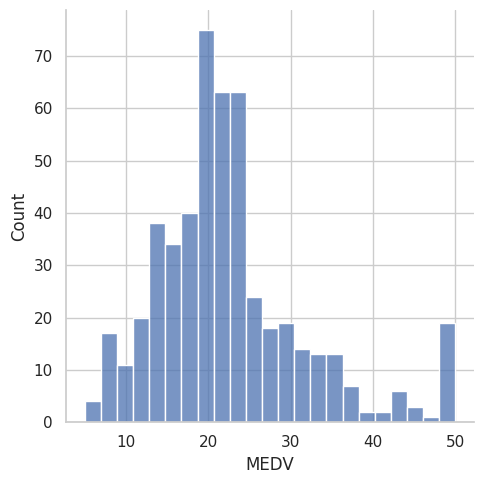

In [493]:

sns.displot(df['MEDV'])  # Create a histogram of the 'MEDV' column in the DataFrame `df`
# This help to visualize the distribution of values in the 'MEDV' which is important in understanding the range,
# frequency, and shape of the data distribution.

<Axes: >

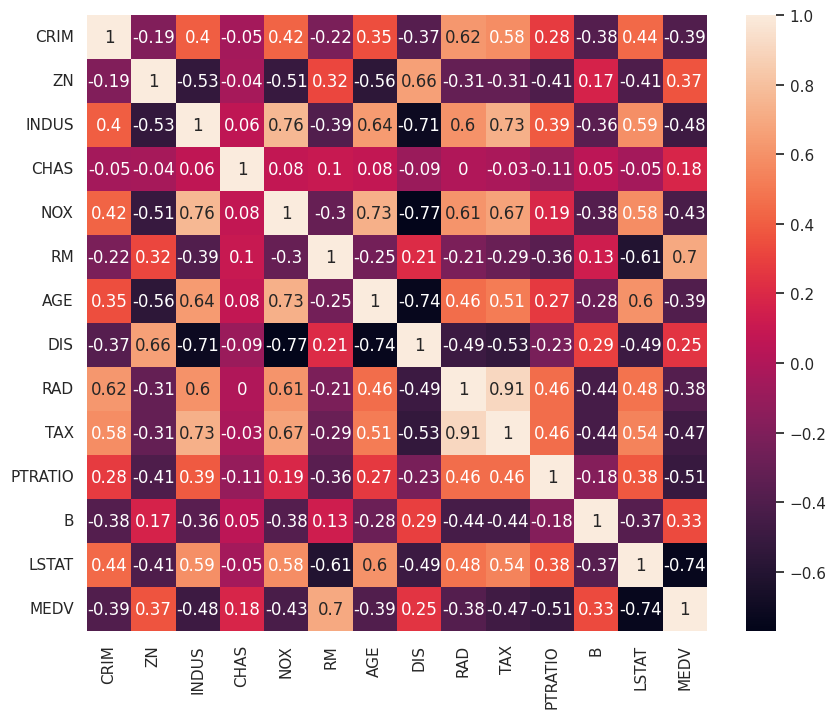

In [494]:
corMatrix = df.corr().round(2)  # Calculate the correlation matrix for the DataFrame `df` and round the values to 1 decimal point
# correlation matrix shows the pairwise correlation between the columns of the DataFrame
sns.heatmap(data=corMatrix, annot=True)  # Create a heatmap to visualize the correlation matrix with annotated values

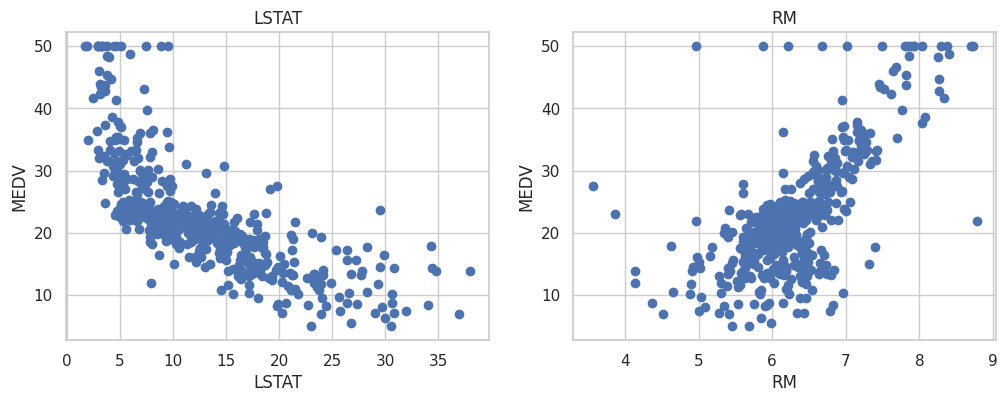

In [495]:
# As seen in the above heatmap, 'LSTAT' and 'RM' have the maximum correlation of -0.74 and 0.7 respectively on 'MEDV'.
# The negative sign shows they are inversly related, one increase the other decrease
# Now we will plot these two against 'MEDV'
plt.figure(figsize=(12, 4))  # Create a new figure with a specific size
features = ['LSTAT', 'RM']  # Define a list of features to plot
dependent = df['MEDV']  # Extract the target variable from the DataFrame `data`

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)  # Create a subplot for each feature
    x = df[col]  # Set the x-values as the corresponding feature values
    y = dependent  # Set the y-values as the target variable
    plt.scatter(x, y, marker='o')  # Create a scatter plot of the feature against the dependent variable
    plt.title(col)  # Set the title of the subplot as the feature name
    plt.xlabel(col)  # Set the x-axis label as the feature name
    plt.ylabel('MEDV')  # Set the y-axis label as 'MEDV'

In [496]:
df.dropna(inplace=True)  # Drop rows with missing values from the DataFrame `df`
# Create a new DataFrame `x` with columns 'LSTAT' and 'RM' from the original DataFrame `data`
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])  
x = x.fillna(x.mean()).values  # Fill any missing values in `x` with the mean of each column and convert it to a NumPy array
y = df['MEDV'].values  # Extract the 'MEDV' column from the original DataFrame `data` and convert it to a NumPy array

In [497]:
def myNormalize(x):
    mean0 = np.mean(x, axis=0)  # Calculate the mean of each feature along axis 0
    sdv0 = np.std(x, ddof=1, axis=0)  # Calculate the standard deviation of each feature along axis 0 
    x_normal = (x - mean0) / sdv0  # Perform feature normalization by subtracting the mean and dividing by the standard deviation
    return x_normal, mean0, sdv0  # Return the normalized features, mean, and standard deviation

In [498]:
# Normalize the dataset `x` using `myNormalize` function  
# Assign the normalized features, mean, and standard deviation to `x_train`, `mu`, and `sigma`, respectively
x_train, mean0, sdv0 = myNormalize(x)  
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))  # Add a column of ones to the left of `x_train` using `np.hstack()`

In [499]:
def computeConstMulti(x, y, theta):
    h = np.dot(x, theta) - y  # Compute the hypothesis values by taking the dot product of the feature matrix `x` and the parameter vector `theta`, and subtracting the target values `y`
    j = np.dot(h, h) / (2 * x.shape[0])  # Compute the cost function by taking the dot product of `h` with itself and dividing by twice the number of training examples `x.shape[0]`
    return j  # Return the computed cost function value

In [500]:
def gradientDescentMultiple(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)  # Create an array to store the cost function values at each iteration
    for i in range(num_iters):
        theta = theta - (alpha / x.shape[0]) * np.dot(x.T, (np.dot(x, theta) - y))
        J_history[i] = computeConstMulti(x, y, theta)  # Compute the cost function value and store it in the `J_history` array
    return theta, J_history  # Return the optimized parameter values (`theta`) and the history of cost function values (`J_history`)

In [501]:
theta = np.zeros(3)  # Initialize the parameter vector `theta` with zeros
alpha = 0.02  # Set the learning rate (step size) to 0.02
num_iter = 250  # Set the number of iterations for gradient descent to 250

theta, J_history = gradientDescentMultiple(x_train, y, theta, alpha, num_iter)
theta

array([22.21643122, -4.30415189,  3.89340994])

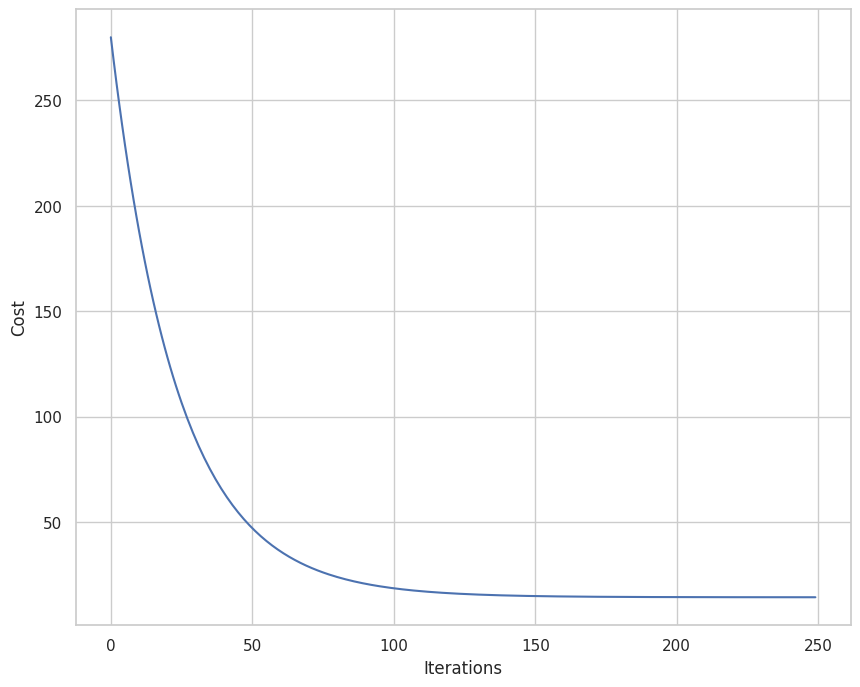

In [502]:
plt.figure()  # Create a new figure for the plot
plt.plot(np.arange(num_iter), J_history)  # Plot the cost function values (`J_history`) against the iterations
plt.xlabel('Iterations')  # Set the x-axis label to 'Iterations'
plt.ylabel('Cost')  # Set the y-axis label to 'Cost'
plt.show()  # Display the plot

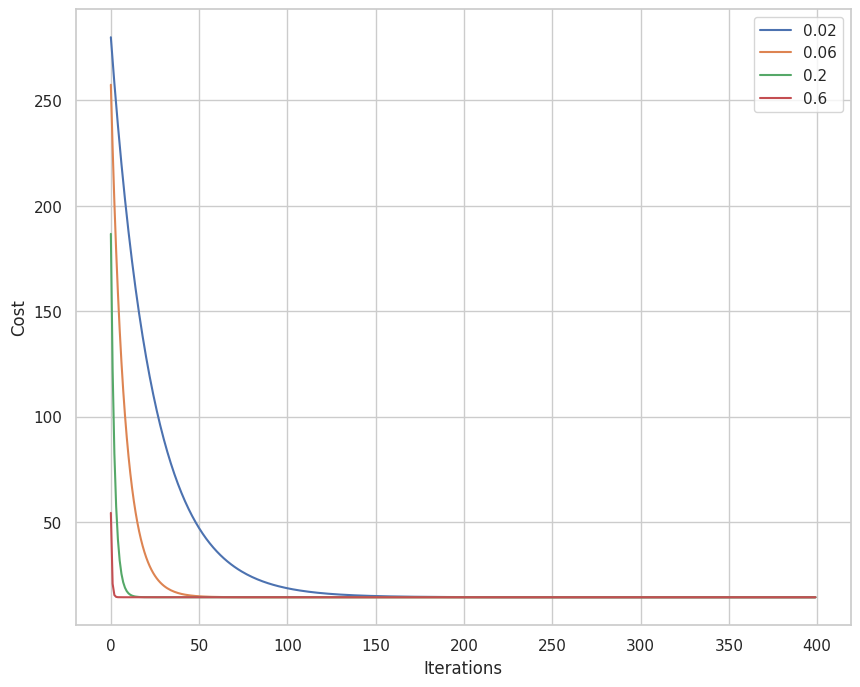

In [503]:
alphas = [0.02, 0.06, 0.2, 0.6]  # List of learning rates to try

plt.figure()  # Create a new figure for the plot

for alpha in alphas:  # Iterate over the learning rates
    theta = np.zeros(3)  # Initialize the parameter vector `theta` with zeros
    num_iters = 400  # Set the number of iterations for gradient descent to 400
    theta, J_history = gradientDescentMultiple(x_train, y, theta, alpha, num_iters)  # Run gradient descent for the current learning rate
    plt.plot(np.arange(num_iters), J_history, label=str(alpha))  # Plot the cost function values (`J_history`) against the iterations with a label representing the learning rate

plt.xlabel('Iterations')  # Set the x-axis label to 'Iterations'
plt.ylabel('Cost')  # Set the y-axis label to 'Cost'
plt.legend()  # Display the legend with labels representing the learning rates
plt.show()  # Display the plot

In [504]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])  # Create a DataFrame `x` with columns 'LSTAT' and 'RM' from the `data` DataFrame
y = df['MEDV']  # Assign the 'MEDV' column from the `data` DataFrame to the pandas Series `y`

In [505]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)  
print("Shape of training feature set: ", X_train.shape)
print("Shape of testing feature set: ", X_test.shape)
print("Shape of training dependent set: {0} and Shape of testing dependent set: {1}".format(Y_train.shape, Y_test.shape)) 

Shape of training feature set:  (315, 2)
Shape of testing feature set:  (79, 2)
Shape of training dependent set: (315,) and Shape of testing dependent set: (79,)


In [506]:
lin_model = LinearRegression()  # Create an instance of the LinearRegression model
lin_model.fit(X_train.fillna(x_train.mean()), Y_train)  # Fit the model to the training data

LinearRegression()

In [507]:
y_train_predict = lin_model.predict(X_train)
rmseTrain = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2Train = r2_score(Y_train, y_train_predict)
print("The LinearRegression model has the RMSE score of {0} and r2 score of {1} for the testing set.".format(rmseTrain, r2Train))
y_test_predict = lin_model.predict(X_test)
rmseTest = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2Test = r2_score(Y_test, y_test_predict)
print("The LinearRegression model has the RMSE score of {0} and r2 score of {1} for the testing set.".format(rmseTest, r2Test))

The LinearRegression model has the RMSE score of 5.427340433961609 and r2 score of 0.6479023967476797 for the testing set.
The LinearRegression model has the RMSE score of 4.981788036611333 and r2 score of 0.6900038035365315 for the testing set.
